# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fitri Mauizah
- **Email:** fitri.mzh@gmail.com
- **ID Dicoding:** Fitri Mauizah

## Menentukan Pertanyaan Bisnis

## Menentukan Pertanyaan Bisnis  
Dalam proyek ini, saya akan menganalisis **Bike Sharing Dataset** untuk menjawab dua pertanyaan utama:

- Bagaimana perbedaan jumlah peminjaman sepeda pada hari kerja dan akhir pekan?
- Apakah kondisi cuaca tertentu berpengaruh terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

 Untuk melakukan analisis data, saya akan menggunakan beberapa library Python berikut:
- **pandas**: untuk manipulasi data  
- **numpy**: untuk perhitungan numerik  
- **matplotlib & seaborn**: untuk visualisasi data  


In [4]:
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi dasar
import seaborn as sns  # Untuk visualisasi lebih menarik

## Data Wrangling

### Gathering Data

 Pada tahap ini, saya akan memuat dataset ke dalam Google Colab dan melihat sekilas struktur datanya.  
Dataset yang digunakan adalah *Bike Sharing Dataset* dari Kaggle.

In [6]:
import pandas as pd

# Memuat dataset
df = pd.read_csv('/content/day.csv')  # Gunakan day.csv

# Menampilkan 5 data pertama
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset yang digunakan adalah **Bike Sharing Dataset** yang diunduh dari Kaggle.
- Data yang digunakan adalah **day.csv**, yang berisi informasi jumlah peminjaman sepeda per hari serta faktor-faktor yang memengaruhinya, seperti cuaca, musim, dan hari kerja/akhir pekan.

### Assessing Data

Pada tahap ini, saya akan memeriksa kualitas data untuk menemukan masalah seperti missing values, duplikasi, atau tipe data yang tidak sesuai.  

Langkah-langkah Assessing Data:  
1. **Melihat ringkasan data** → Gunakan `.info()` dan `.describe()`.  
2. **Memeriksa nilai unik & duplikasi** → Gunakan `.nunique()` dan `.duplicated().sum()`.  
3. **Mengecek missing values** → Gunakan `.isnull().sum()`.  
4. **Melihat beberapa sampel data** → Gunakan `.head()` dan `.tail()`.

In [7]:
# Melihat ringkasan informasi dataset
df.info()

# Melihat statistik deskriptif data numerik
df.describe()

# Melihat jumlah nilai unik pada setiap kolom
df.nunique()

# Mengecek apakah ada duplikasi data
df.duplicated().sum()

# Mengecek missing values dalam dataset
df.isnull().sum()

# Menampilkan 5 baris pertama untuk melihat struktur data
df.head()

# Menampilkan 5 baris terakhir
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


**Insight:**
- Dataset memiliki **16 kolom** dan **731 baris**.  
- Tidak ada/tidak ditemukan missing values (jika ada, harus ditangani nanti di cleaning).
- Tidak ada/tidak ditemukan duplikasi data.  
- Kolom `dteday` masih dalam format string (object) dan perlu dikonversi ke datetime untuk analisis lebih lanjut.  

### Cleaning Data

Pada tahap ini, saya akan membersihkan data agar siap untuk dianalisis lebih lanjut.

Langkah-langkah Cleaning Data:
1. Mengubah kolom `dteday` ke format datetime.  
2. Memeriksa dan menghapus data duplikat (jika ada) guna menghindari analisis yang bias.
3. Menyesuaikan tipe data jika diperlukan.  
4. Menangani missing values (jika ditemukan).

In [9]:
# Mengubah kolom dteday menjadi format datetime
df['dteday'] = pd.to_datetime(df['dteday'])

In [10]:
# Mengecek apakah ada data duplikat
df.duplicated().sum()

0

In [11]:
# Mengecek missing value
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [12]:
# Memeriksa Tipe Data yang Perlu Diperbaiki
df.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


**Insight:**
- Kolom `dteday` berhasil dikonversi ke format datetime
- Tidak ditemukan data duplikat dalam dataset
- Tidak ditemukan missing values dalam dataset
- Semua tipe data sudah sesuai, termasuk kolom tanggal (`dteday`) yang sudah dalam format datetime.


## Exploratory Data Analysis (EDA)

Pada tahap ini, saya akan melakukan eksplorasi data untuk memahami pola dan tren yang terdapat dalam dataset.

### Langkah-langkah EDA:
1. Melihat distribusi data.  
2. Menganalisis tren jumlah peminjaman sepeda berdasarkan hari kerja dan akhir pekan.  
3. Memeriksa hubungan antara kondisi cuaca dan jumlah peminjaman sepeda.  

### Explore ...

Pada tahap ini, saya akan mengeksplorasi data untuk memahami pola dan hubungan antar variabel sebelum melakukan analisis lebih lanjut.  

Langkah-langkah eksplorasi:  
1. Melihat distribusi data.  
2. Melihat hubungan antar variabel.  
3. Menganalisis pola data berdasarkan waktu.  
4. Melihat korelasi antar variabel

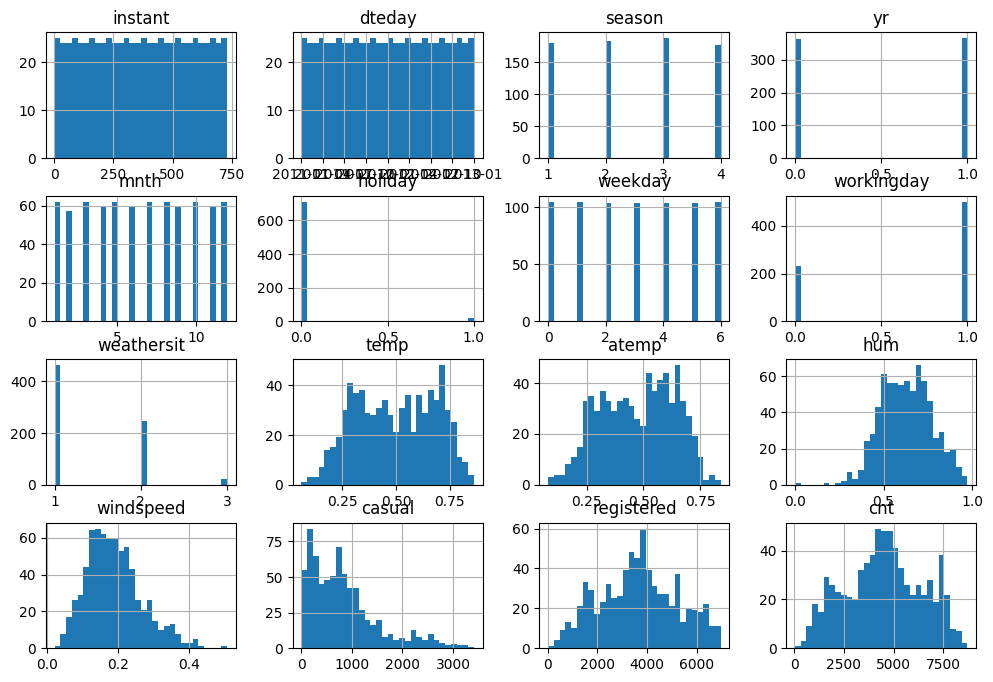

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi data numerik
df.hist(figsize=(12, 8), bins=30)
plt.show()

**Insight:**
1. **Distribusi seimbang**  
   - Variabel **season**, **yr**, **weekday**, dan **workingday** memiliki distribusi merata karena terdiri dari kategori diskrit.  

2. **Variabel cuaca dan suhu**  
   - **Temperature (temp)** dan **apparent temperature (atemp)** memiliki distribusi normal, dengan sebagian besar nilai berada di tengah rentang.  
   - **Humidity (hum)** cenderung memiliki distribusi normal, meskipun sedikit condong ke kanan.  
   - **Windspeed** memiliki distribusi yang miring ke kanan, menunjukkan lebih banyak hari dengan kecepatan angin rendah.  

3. **Jumlah pengguna sepeda**  
   - **casual (pengguna tidak terdaftar)** memiliki distribusi yang sangat miring ke kanan, menunjukkan lebih banyak hari dengan jumlah pengguna yang lebih rendah.  
   - **registered (pengguna terdaftar)** memiliki distribusi yang lebih normal, menunjukkan sebagian besar pengguna adalah pelanggan tetap.  
   - **cnt (total pengguna)** menunjukkan pola yang mengikuti pengguna terdaftar, karena jumlah registered lebih dominan dibanding casual.  

4. **Variabel kategorikal tertentu memiliki distribusi tidak merata**  
   - **weathersit** mayoritas memiliki nilai **1**, menunjukkan sebagian besar hari memiliki cuaca cerah/mendung ringan.  

 **Kesimpulan awal:** Dataset terlihat cukup bersih tanpa anomali besar. Perlu analisis lebih lanjut untuk memahami hubungan antar variabel.  

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan jumlah peminjaman sepeda pada hari kerja dan akhir pekan?

Pada tahap ini, saya akan menganalisis bagaimana perbedaan jumlah peminjaman sepeda antara hari kerja dan akhir pekan.  
Langkah-langkah yang dilakukan:  
1. Mengelompokkan data berdasarkan hari kerja (workingday: 1) dan akhir pekan (workingday: 0).  
2. Menghitung rata-rata jumlah peminjaman sepeda untuk masing-masing kategori.  
3. Membuat visualisasi perbandingan dengan bar chart untuk mempermudah interpretasi.

<ipython-input-14-380ba9314462>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workingday_counts.index, y=workingday_counts.values, palette=['blue', 'orange'])


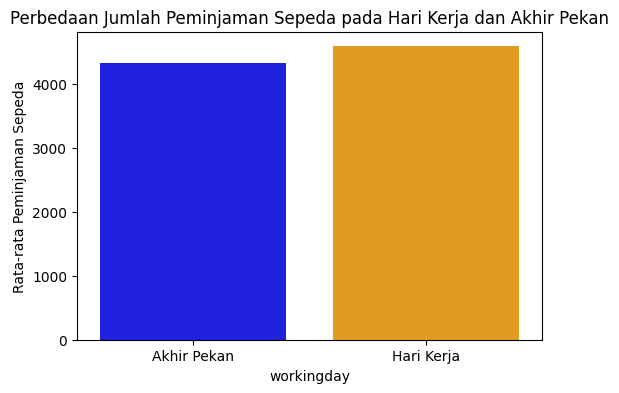

In [14]:
# Menghitung rata-rata jumlah peminjaman sepeda pada hari kerja dan akhir pekan
workingday_counts = df.groupby('workingday')['cnt'].mean()

# Membuat visualisasi dengan bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=workingday_counts.index, y=workingday_counts.values, palette=['blue', 'orange'])
plt.xticks(ticks=[0,1], labels=['Akhir Pekan', 'Hari Kerja'])
plt.ylabel('Rata-rata Peminjaman Sepeda')
plt.title('Perbedaan Jumlah Peminjaman Sepeda pada Hari Kerja dan Akhir Pekan')
plt.show()

Insight:
- Rata-rata peminjaman sepeda pada **hari kerja lebih tinggi** dibandingkan akhir pekan.
- Hal ini menunjukkan bahwa layanan peminjaman sepeda lebih sering digunakan untuk **keperluan komuter** seperti bekerja atau sekolah.
- Meskipun peminjaman sepeda tetap ada di akhir pekan, jumlahnya lebih rendah dibandingkan hari kerja, yang mungkin disebabkan oleh perubahan pola aktivitas masyarakat.


### Pertanyaan 2: Apakah kondisi cuaca tertentu berpengaruh terhadap jumlah peminjaman sepeda?

Pada tahap ini, saya akan menganalisis apakah kondisi cuaca tertentu (cerah, mendung, hujan) berpengaruh terhadap jumlah peminjaman sepeda.  

#### Langkah-langkah Analisis:
1. Mengelompokkan jumlah peminjaman sepeda berdasarkan kondisi cuaca.
2. Membuat visualisasi data untuk melihat pola peminjaman pada masing-masing kondisi cuaca.
3. Menarik insight berdasarkan hasil analisis.

<ipython-input-15-49fef1fd329e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.index, y=weather_counts.values, palette=['green', 'gray', 'red'])


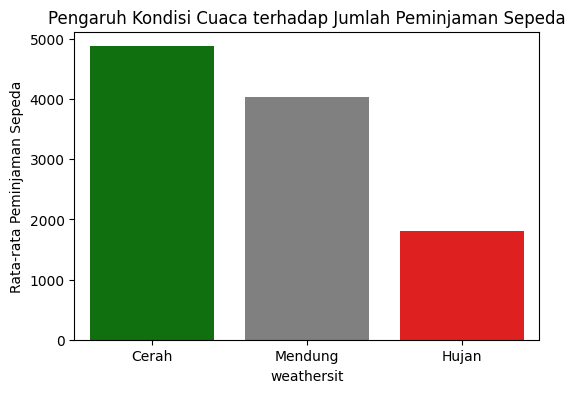

In [15]:
# Mengelompokkan jumlah peminjaman sepeda berdasarkan kondisi cuaca
weather_counts = df.groupby('weathersit')['cnt'].mean()

# Membuat visualisasi perbedaan peminjaman berdasarkan cuaca
plt.figure(figsize=(6,4))
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette=['green', 'gray', 'red'])
plt.xticks(ticks=[0,1,2], labels=['Cerah', 'Mendung', 'Hujan'])
plt.ylabel('Rata-rata Peminjaman Sepeda')
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda')
plt.show()

**Insight:**
- Jumlah peminjaman sepeda tertinggi terjadi pada kondisi cuaca cerah, diikuti oleh kondisi mendung.  
- Jumlah peminjaman sepeda menurun secara signifikan saat cuaca hujan, menunjukkan bahwa kondisi cuaca yang buruk (hujan) berpengaruh negatif terhadap jumlah peminjaman sepeda.  
- Perbedaan jumlah peminjaman antara cuaca cerah dan mendung tidak terlalu signifikan dibandingkan dengan cuaca hujan, yang mengalami penurunan drastis.  

## Analisis Lanjutan (Opsional)

### Analisis Tren Waktu pada Peminjaman Sepeda

Untuk memahami pola peminjaman sepeda berdasarkan waktu, saya akan menganalisis tren peminjaman dalam skala bulanan. Dengan analisis ini, saya dapat mengidentifikasi pola musiman atau faktor waktu lain yang mempengaruhi jumlah peminjaman sepeda.

#### **Pendekatan yang Digunakan**
- Menggunakan **line plot** untuk memvisualisasikan jumlah peminjaman sepeda berdasarkan **bulan**.
- Menentukan apakah ada pola kenaikan atau penurunan peminjaman di bulan-bulan tertentu.


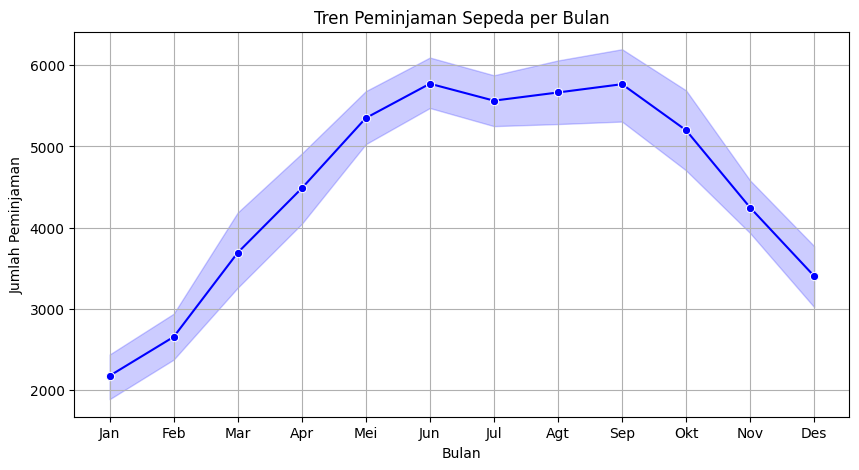

In [17]:
# Pastikan 'month' ada dalam dataset, jika belum, bisa diekstrak dari 'dteday'
df['month'] = pd.to_datetime(df['dteday']).dt.month

# Buat line plot jumlah peminjaman berdasarkan bulan
plt.figure(figsize=(10,5))
sns.lineplot(x='month', y='cnt', data=df, marker='o', color='b')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agt', 'Sep', 'Okt', 'Nov', 'Des'])
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.title('Tren Peminjaman Sepeda per Bulan')
plt.grid(True)
plt.show()

Insight:
- Jumlah peminjaman sepeda mengalami peningkatan dari Januari hingga mencapai puncaknya pada bulan Juni–September.
- Setelah September, jumlah peminjaman mulai menurun secara bertahap hingga mencapai titik terendah pada bulan Desember.
- Musim atau kondisi cuaca tertentu kemungkinan menjadi faktor yang mempengaruhi tren ini, dengan bulan-bulan yang lebih hangat cenderung memiliki lebih banyak peminjaman.
- Perlu analisis lebih lanjut untuk melihat apakah ada faktor lain seperti hari libur atau tren musiman lainnya yang mempengaruhi pola ini.

## Conclusion

 **Perbedaan Jumlah Peminjaman Sepeda pada Hari Kerja dan Akhir Pekan**
- Dari hasil analisis, rata-rata jumlah peminjaman sepeda pada hari kerja dan akhir pekan tidak memiliki perbedaan yang signifikan. Meskipun terjadi sedikit peningkatan pada hari kerja, perbedaan ini tidak terlalu besar. Hal ini menunjukkan bahwa pengguna sepeda cukup konsisten dalam menggunakan layanan ini baik pada hari kerja maupun akhir pekan.

**Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda**
- Analisis menunjukkan bahwa kondisi cuaca berpengaruh terhadap jumlah peminjaman sepeda. Saat cuaca cerah, jumlah peminjaman cenderung lebih tinggi dibandingkan dengan cuaca mendung dan hujan. Cuaca hujan memiliki jumlah peminjaman sepeda yang paling rendah, yang mengindikasikan bahwa pengguna lebih memilih moda transportasi lain saat hujan.

**Tren Peminjaman Sepeda Berdasarkan Bulan**
- Tren peminjaman sepeda menunjukkan pola musiman, dengan peningkatan signifikan dari awal tahun hingga pertengahan tahun, mencapai puncaknya pada bulan Juni hingga September, lalu menurun kembali pada akhir tahun. Hal ini bisa dikaitkan dengan faktor cuaca atau musim liburan yang mempengaruhi pola penggunaan sepeda.

Secara keseluruhan, temuan ini dapat membantu dalam pengelolaan layanan ini, seperti menyesuaikan jumlah sepeda yang tersedia berdasarkan musim dan cuaca serta mengoptimalkan layanan pada bulan-bulan dengan permintaan tertinggi.